In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math as m
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/money/Train',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/money/Validation',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 163 images belonging to 11 classes.
Found 53 images belonging to 11 classes.


In [7]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/30
55/55 [==============================] - 45s 792ms/step - loss: 2.5854 - accuracy: 0.0859 - val_loss: 2.3966 - val_accuracy: 0.0943
Epoch 2/30
55/55 [==============================] - 12s 211ms/step - loss: 2.4023 - accuracy: 0.1104 - val_loss: 2.3932 - val_accuracy: 0.1509
Epoch 3/30
55/55 [==============================] - 11s 205ms/step - loss: 2.4033 - accuracy: 0.1043 - val_loss: 2.3912 - val_accuracy: 0.0943
Epoch 4/30
55/55 [==============================] - 11s 204ms/step - loss: 2.3893 - accuracy: 0.0736 - val_loss: 2.3909 - val_accuracy: 0.1321
Epoch 5/30
55/55 [==============================] - 11s 203ms/step - loss: 2.4037 - accuracy: 0.1043 - val_loss: 2.3911 - val_accuracy: 0.0377
Epoch 6/30
55/55 [==============================] - 11s 202ms/step - loss: 2.3891 - accuracy: 0.1534 - val_loss: 2.3736 - val_accuracy: 0.1132
Epoch 7/30
55/55 [==============================] - 11s 203ms/step - loss: 2.3855 - accuracy: 0.1227 - val_loss: 2.3825 - val_accuracy: 0.1321

In [8]:
from keras.models import Sequential, load_model

In [9]:
validation_dataset.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

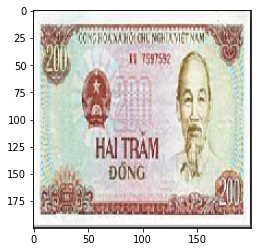

200


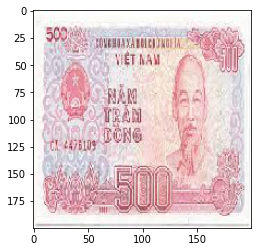

200


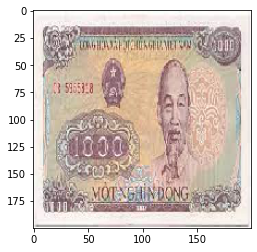

1000


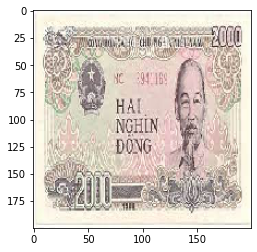

2000


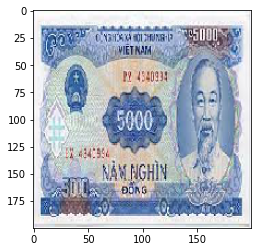

5000


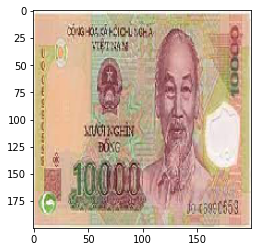

10000


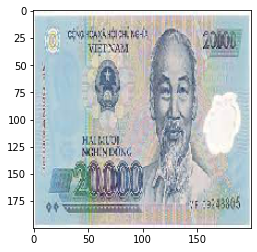

20000


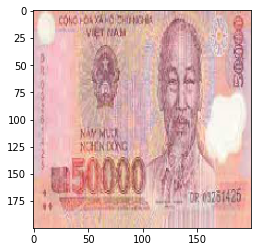

50000


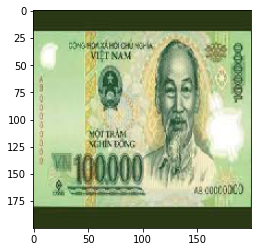

100000


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/money/Test'

for i in range (9):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(200,200))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("1000")
    elif predict==1: 
      print("10000")
    elif predict==2: 
      print("100000")
    elif predict==3: 
      print("200")
    elif predict==4: 
      print("2000")
    elif predict==5: 
      print("20000")
    elif predict==6: 
      print("200000")
    elif predict==7: 
      print("500")
    elif predict==8: 
      print("5000")
    elif predict==9: 
      print("50000")
    elif predict==10:
      print("500000")